In [ ]:
# Google Colaboratoryを使用する場合は、下記のコメントアウトを外し、実行してください

In [ ]:
# # 下記セルを実行すると、authorization codeの入力を求められます。
# # 出力されたリンク先をクリックし、Googleアカウントにログインし、
# # authorization codeをコピーし、貼り付けをおこなってください。
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# working_dir = 'MLSys_100Knocks' #　※※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
# path = f'/content/drive/MyDrive/{working_dir}/本章/2章'
# os.chdir(path)
# ! pip install japanize-matplotlib

# ２章 データを可視化し分析を行う１０本ノック

### ノック１１：データを読み込んで不要なものを除外しよう
> `cf.`
>
> + [pandasの使い方 〜列名や行名を取得する〜 - Pythonの勉強](http://mryksy.hatenablog.com/entry/2018/02/18/130343)

In [1]:
# データ読込
import pandas as pd
order_data = pd.read_csv("../chapter01/output/order_data.csv")
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,16514392,64,C44271355,49,56527968,2020-06-01 11:00:00,2020-06-01 11:55:00,0,2732,2,西東京店,TK,東京,東京,delivery,passed
1,28342394,12,C98307866,98,46924304,2020-06-01 11:00:00,2020-06-01 11:52:00,0,2064,2,西葛西店,TK,東京,東京,delivery,passed
2,29799587,174,C59484037,45,47054474,2020-06-01 11:00:00,2020-06-01 11:25:00,0,3900,2,新座店,SA,埼玉,埼玉,delivery,passed
3,96960753,23,C57278332,70,60848267,2020-06-01 11:00:00,2020-06-01 11:45:00,0,2750,2,江東店,TK,東京,東京,delivery,passed
4,52147209,7,C36890849,80,20633593,2020-06-01 11:00:00,2020-06-01 11:23:00,0,2328,2,東尾久店,TK,東京,東京,delivery,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703875,47039360,154,C39765066,90,27121351,2020-05-31 21:58:58,2020-05-31 22:42:58,1,2363,1,入間店,SA,埼玉,埼玉,takeout,payment
703876,61054188,94,C19465010,41,61513298,2020-05-31 21:58:58,2020-05-31 22:40:58,0,2112,2,鎌倉店,KN,神奈川,神奈川,delivery,passed
703877,45288914,11,C23883838,40,65359139,2020-05-31 21:58:58,2020-05-31 22:38:58,0,3838,2,江戸川店,TK,東京,東京,delivery,passed
703878,41608372,149,C48350551,43,42138977,2020-05-31 21:58:58,2020-05-31 22:52:58,0,1899,2,松戸店,CH,千葉,千葉,delivery,passed


> この章での分析は`金額がメイン`となるためステータスが０：受付、９：キャンセルはノイズとして弾く。<br>
> しかし、注文回数やキャンセル回数を見るなど、分析の視点によっては含めたままの状態が望ましい場合もあります。<br>
> どのデータをどの時点で除外するかの考慮はとても大事で、欲しかった情報が早い段階で削除されていた、ということもよくあります（吟味は大切！）

In [2]:
# 不要なものを除外( status １か２を指定して格納＝stauts 0:reception と9:cancel は除外)
order_data = order_data.loc[(order_data["status"] == 1)|(order_data["status"] == 2)]
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,16514392,64,C44271355,49,56527968,2020-06-01 11:00:00,2020-06-01 11:55:00,0,2732,2,西東京店,TK,東京,東京,delivery,passed
1,28342394,12,C98307866,98,46924304,2020-06-01 11:00:00,2020-06-01 11:52:00,0,2064,2,西葛西店,TK,東京,東京,delivery,passed
2,29799587,174,C59484037,45,47054474,2020-06-01 11:00:00,2020-06-01 11:25:00,0,3900,2,新座店,SA,埼玉,埼玉,delivery,passed
3,96960753,23,C57278332,70,60848267,2020-06-01 11:00:00,2020-06-01 11:45:00,0,2750,2,江東店,TK,東京,東京,delivery,passed
4,52147209,7,C36890849,80,20633593,2020-06-01 11:00:00,2020-06-01 11:23:00,0,2328,2,東尾久店,TK,東京,東京,delivery,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703875,47039360,154,C39765066,90,27121351,2020-05-31 21:58:58,2020-05-31 22:42:58,1,2363,1,入間店,SA,埼玉,埼玉,takeout,payment
703876,61054188,94,C19465010,41,61513298,2020-05-31 21:58:58,2020-05-31 22:40:58,0,2112,2,鎌倉店,KN,神奈川,神奈川,delivery,passed
703877,45288914,11,C23883838,40,65359139,2020-05-31 21:58:58,2020-05-31 22:38:58,0,3838,2,江戸川店,TK,東京,東京,delivery,passed
703878,41608372,149,C48350551,43,42138977,2020-05-31 21:58:58,2020-05-31 22:52:58,0,1899,2,松戸店,CH,千葉,千葉,delivery,passed


In [3]:
order_data.columns

Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [4]:
# これからの分析に用いるデータフレーム作成
analyze_col_list = ["store_id", "customer_id", "coupon_cd", "order_accept_date", "delivered_date", "total_amount", "store_name", "wide_area", "narrow_area", "takeout_name", "status_name"]
analyze_data = order_data[analyze_col_list]
analyze_data

,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,64,C44271355,49,2020-06-01 11:00:00,2020-06-01 11:55:00,2732,西東京店,東京,東京,delivery,passed
1,12,C98307866,98,2020-06-01 11:00:00,2020-06-01 11:52:00,2064,西葛西店,東京,東京,delivery,passed
2,174,C59484037,45,2020-06-01 11:00:00,2020-06-01 11:25:00,3900,新座店,埼玉,埼玉,delivery,passed
3,23,C57278332,70,2020-06-01 11:00:00,2020-06-01 11:45:00,2750,江東店,東京,東京,delivery,passed
4,7,C36890849,80,2020-06-01 11:00:00,2020-06-01 11:23:00,2328,東尾久店,東京,東京,delivery,passed
...,...,...,...,...,...,...,...,...,...,...,...
703875,154,C39765066,90,2020-05-31 21:58:58,2020-05-31 22:42:58,2363,入間店,埼玉,埼玉,takeout,payment
703876,94,C19465010,41,2020-05-31 21:58:58,2020-05-31 22:40:58,2112,鎌倉店,神奈川,神奈川,delivery,passed
703877,11,C23883838,40,2020-05-31 21:58:58,2020-05-31 22:38:58,3838,江戸川店,東京,東京,delivery,passed
703878,149,C48350551,43,2020-05-31 21:58:58,2020-05-31 22:52:58,1899,松戸店,千葉,千葉,delivery,passed


### ノック１２：データの全体像を把握しよう

In [5]:
#データ統計量を確認
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [6]:
# データ型を確認
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [7]:
# データ型変更
analyze_data[["store_id", "coupon_cd"]] = analyze_data[["store_id", "coupon_cd"]].astype(str)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


> `(Warning:)`<br>
> analyze_dataの型を変えたのですが、本来は`analyze_data`の参照元である`order_data`の型を変えるべき、というのがワーニングの原因のようです。<br>
> (データをうまく整理できていればこの状況は回避できると思いますが、処理が込み入ってくると、そうも言っていられない場合があります。また、型変換は後からでもできますので、必要なタイミングで実施すれば良いと思います。)<br>
>
> あくまでも予備知識です。なるべくワーニングが出ない書き方を意識してみて下さい。

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
analyze_data.dtypes

store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

### ノック１３：月別の売上を集計してみよう

In [10]:
# 日時型に変換し、さらに年月項目を作成
analyze_data["order_accept_date"] =  pd.to_datetime(analyze_data["order_accept_date"]) #object型 → datetime型
analyze_data["order_accept_month"] = analyze_data["order_accept_date"].dt.strftime("%Y%m") #月集計の為に項目追加
analyze_data[["order_accept_date", "order_accept_month"]].head()

,order_accept_date,order_accept_month
0,2020-06-01 11:00:00,202006
1,2020-06-01 11:00:00,202006
2,2020-06-01 11:00:00,202006
3,2020-06-01 11:00:00,202006
4,2020-06-01 11:00:00,202006


In [11]:
# order_accept_dateはdatetime型に変更しているかの確認
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date                object
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
dtype: object

In [12]:
analyze_data["delivered_date"] = pd.to_datetime(analyze_data["delivered_date"])
analyze_data["delivered_month"] = analyze_data["delivered_date"].dt.strftime("%Y%m")
analyze_data.head()

,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name,order_accept_month,delivered_month
0,64,C44271355,49,2020-06-01 11:00:00,2020-06-01 11:55:00,2732,西東京店,東京,東京,delivery,passed,202006,202006
1,12,C98307866,98,2020-06-01 11:00:00,2020-06-01 11:52:00,2064,西葛西店,東京,東京,delivery,passed,202006,202006
2,174,C59484037,45,2020-06-01 11:00:00,2020-06-01 11:25:00,3900,新座店,埼玉,埼玉,delivery,passed,202006,202006
3,23,C57278332,70,2020-06-01 11:00:00,2020-06-01 11:45:00,2750,江東店,東京,東京,delivery,passed,202006,202006
4,7,C36890849,80,2020-06-01 11:00:00,2020-06-01 11:23:00,2328,東尾久店,東京,東京,delivery,passed,202006,202006


In [13]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [14]:
# 月別で総額統計量をみる
month_data = analyze_data.groupby("order_accept_month")
month_data.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 189414.0  2959.440638  954.271169  698.0  2308.0   
202005                 195684.0  2960.327799  954.823248  698.0  2308.0   
202006                 189338.0  2960.486437  953.740057  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3617.0  5100.0

In [15]:
# 月別の総額の合計値をみる
month_data.sum()

,total_amount
order_accept_month,
202004,560559489
202005,579288785
202006,560532581


In [16]:
# エリア別の総額の統計量みる
area_data = analyze_data.groupby("wide_area")
area_data.describe()

total_amount                                                  \
                 count         mean         std    min     25%     50%   
wide_area                                                                
北関東            49427.0  2957.169179  939.869333  698.0  2308.0  2791.0   
千葉             64415.0  2956.096344  963.711005  698.0  2252.0  2808.0   
埼玉             78453.0  2976.937032  952.392197  698.0  2308.0  2808.0   
東京            250274.0  2962.054161  962.939955  698.0  2308.0  2808.0   
神奈川           131867.0  2949.374172  939.374125  698.0  2308.0  2808.0   

                           
              75%     max  
wide_area                  
北関東        3582.0  5100.0  
千葉         3582.0  5100.0  
埼玉         3617.0  5100.0  
東京         3617.0  5100.0  
神奈川        3582.0  5100.0

### ノック１４：月別の推移を可視化してみよう

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='order_accept_month'>

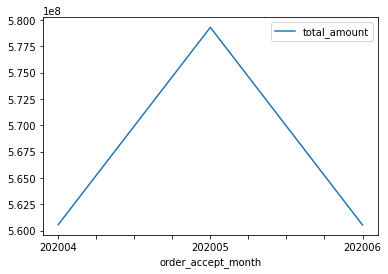

In [18]:
month_data.sum().plot()

<AxesSubplot:xlabel='order_accept_month'>

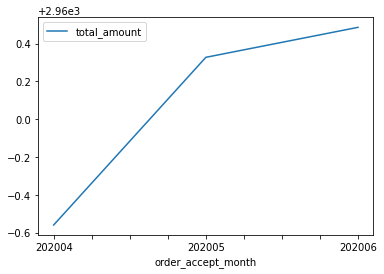

In [19]:
month_data.mean().plot()

### ノック１５：売上からヒストグラムを作成してみよう

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <BarContainer object of 21 artists>)

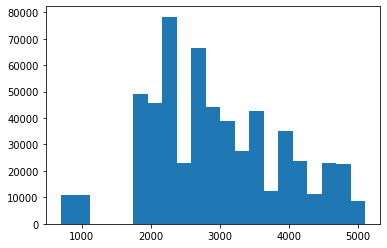

In [20]:
plt.hist(analyze_data["total_amount"], bins=21)

### ノック１６：都道府県別の売上を集計して可視化しよう

In [21]:
# 月別×エリア別のピボット集計
pre_data = pd.pivot_table(analyze_data, index="order_accept_month", columns="narrow_area", values="total_amount", aggfunc="mean")
pre_data

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062000,2976.519634,2960.592173,2992.173548,2948.001171,2942.046543,2947.479814
202005,2953.545504,2977.290771,2962.603059,2998.165682,2949.597054,2948.269611,2941.796835
202006,2955.761885,2976.988380,2962.949987,2991.542844,2950.520464,2945.504744,2935.951783


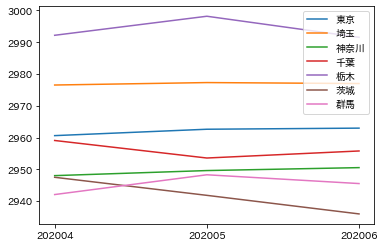

In [22]:
# 月別×エリア別のピボットを可視化
import japanize_matplotlib

pre_list = analyze_data["narrow_area"].unique() #ndarrayで項目取得
for pre in pre_list:
    plt.plot(list(pre_data.index), pre_data[pre], label=pre)
plt.legend()

### ノック１７：クラスタリングに向けてデータを加工しよう

> 200近い店舗がありました。これをそのまま可視化しても、対象が多すぎて、特徴を捉えるのが難しいでしょう。<br>
> 都道府県毎に分けてみたり、特定の店舗だけを見るなど、手段はいろいろありますが、ここから先は`クラスタリング`による店舗のグループ化を検討してみましょう。<br>
> 店舗毎の特徴をもとに幾つかのグループに分けることができれば、グループの特徴に合わせた対応をとることができるかもしれません。<br>
> そこで、まずは注文データを店舗毎に集計し、クラスタリングに使用できる状態にしましょう。

> `cf.`
> 
> + []()

`agg()` aggregation:集計

In [23]:
# 店舗別算出 (オーダー数、平均値、中央値、最大値、最小値)
store_clustering = analyze_data.groupby("store_id").agg(["size", "mean", "median", "max", "min"])["total_amount"]
store_clustering

,size,mean,median,max,min
store_id,,,,,
1,2877,3129.834897,3050,5100,1857
10,2294,2989.003923,2677,5100,698
100,3776,2947.170286,2808,5100,698
101,1740,3074.770115,2877,4744,1899
102,2760,2845.661594,2791,4744,698
...,...,...,...,...,...
95,3360,3063.214583,2852,5100,939
96,2865,2942.725654,2808,4692,698
97,3382,3010.938794,2808,5100,939


In [24]:
store_clustering.reset_index(inplace=True, drop=True) #(クラスタリングの為) index番号を振り直し + 保存

In [25]:
len(store_clustering)

196

In [26]:
store_clustering.head(10)

,size,mean,median,max,min
0,2877,3129.834897,3050,5100,1857
1,2294,2989.003923,2677,5100,698
2,3776,2947.170286,2808,5100,698
3,1740,3074.770115,2877,4744,1899
4,2760,2845.661594,2791,4744,698
5,3548,2927.897125,2808,5100,698
6,3278,2929.562233,2750,5100,698
7,2627,2837.340312,2677,4659,698
8,2179,3003.313905,2808,4692,939
9,2992,2953.208556,2750,5100,698


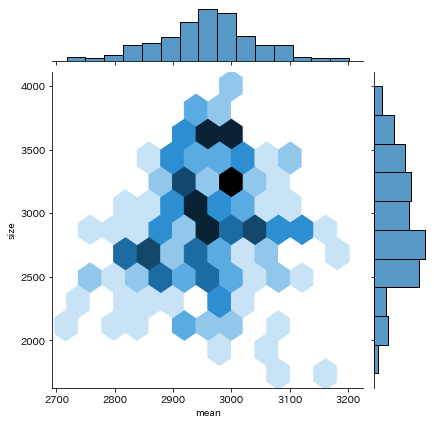

In [27]:
import seaborn as sns
hexbin = sns.jointplot(x="mean", y="size", data=store_clustering, kind="hex")

> 1回あたり2900円~3000円の注文が多いようです。<br>
> オーダー数にも極端な外れ値がないことが見て取れます。

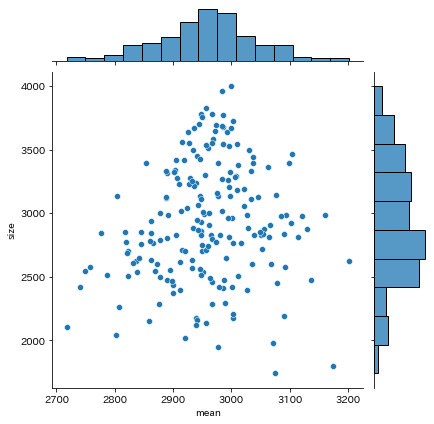

In [28]:
# 散布図
sns.jointplot(x="mean", y="size", data=store_clustering)

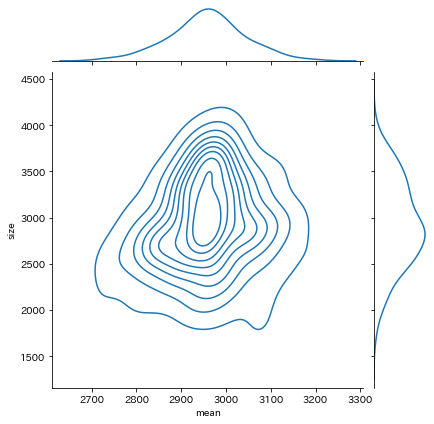

In [29]:
# 密度
sns.jointplot(x="mean", y="size", data=store_clustering, kind="kde")

### ノック１８：クラスタリングで店舗をグループ化してみよう

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

kmeans = KMeans(n_clusters=4, random_state=0) #クラスタ数、ランダムシード定義
clusters = kmeans.fit(store_clustering_sc) #モデルを構築
store_clustering["cluster"] = clusters.labels_ #クラスタリングの結果をstore_clustering["cluster"]に格納し

print("Cluster：", store_clustering["cluster"].unique()) #0,1,2,3 の4つのグループに分けられました
store_clustering.head(10)

Cluster： [0 3 2 1]


,size,mean,median,max,min,cluster
0,2877,3129.834897,3050,5100,1857,0
1,2294,2989.003923,2677,5100,698,3
2,3776,2947.170286,2808,5100,698,2
3,1740,3074.770115,2877,4744,1899,0
4,2760,2845.661594,2791,4744,698,3
5,3548,2927.897125,2808,5100,698,2
6,3278,2929.562233,2750,5100,698,2
7,2627,2837.340312,2677,4659,698,3
8,2179,3003.313905,2808,4692,939,3
9,2992,2953.208556,2750,5100,698,2


### ノック１９：グループの傾向を分析してみよう

In [32]:
# 4つのグループの傾向を分析! まずは、それぞれの件数を確認
store_clustering.columns = ["月内件数", "月内平均", "月内中央値", "月内最大値", "月内最小値", "Cluster"] #各カラムの名前を変更
store_clustering.groupby("Cluster").count() #Clusterでグループバイ集計

,月内件数,月内平均,月内中央値,月内最大値,月内最小値
Cluster,,,,,
0,14,14,14,14,14
1,24,24,24,24,24
2,89,89,89,89,89
3,69,69,69,69,69


> 件数だけを見ると、クラスタ2と3が多く、クラスタ0と1が少ないことがわかります。<br>
> 件数が少ないクラスタOや1に、何かしらの特徴が見られるかもしれません。<br>
> しかし件数だけではこれ以上の掘り下げは難しい。

In [33]:
# 各グループの金額がどうなっているか確認
store_clustering.groupby("Cluster").mean()

,月内件数,月内平均,月内中央値,月内最大値,月内最小値
Cluster,,,,,
0,2514.642857,3071.595911,2880.428571,4896.571429,1882.071429
1,2801.583333,3063.532847,3009.375000,5023.666667,758.250000
2,3274.797753,2967.584258,2796.808989,5080.000000,741.325843
3,2616.463768,2887.247467,2728.217391,4756.304348,743.405797


> それぞれの値から想像すると、クラスタOは最低金額が高めなグループ、クラスタ3は売上が低めのグループのようです。<br>
> 今回は与えた特徴が少ないですが、もっと多くの項目を要素として与えることができれば、さらに面白い傾向がでるかもしれません。

### ノック２０：クラスタリングの結果をt-SNEで可視化しよう

> 今回のように項目（特徴量）が５つある ＝ 高次元データ<br>
> 高次元データを２次元のグラフには落とし込めないから、次元数を減らす必要がある。

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
print("dimension : {} \n{}".format(tsne_df.shape, tsne_df.head()))

dimension : (196, 2) 
           0          1
0  -5.116744   3.308903
1  11.047794   0.016504
2  13.164879   9.757247
3  -6.517968   1.094347
4 -10.660534 -10.523395


In [35]:
tsne_df["Cluster"] = store_clustering["Cluster"]
tsne_df.columns = ["axis_0", "axis_1", "cluster"]
tsne_df.head()

,axis_0,axis_1,cluster
0,-5.116744,3.308903,0
1,11.047794,0.016504,3
2,13.164879,9.757247,2
3,-6.517968,1.094347,0
4,-10.660534,-10.523395,3


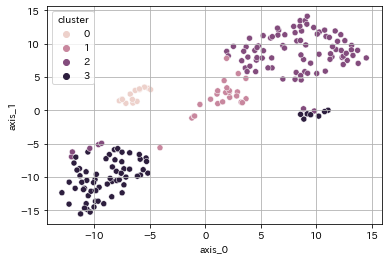

In [40]:
tsne_graph = sns.scatterplot(x="axis_0", y="axis_1", hue="cluster", data=tsne_df)
plt.grid(True)

#### - Scripting

```Python
'''
Imports
'''
import pandas as pd
from sklearn.cluster import KMeans #クラスタリング手法
from sklearn.manifold import TSNE #次元削減手法
from sklearn.preprocessing import StandardScaler
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


'''
Datasets
'''
order_data = pd.read_csv("../chapter01/output/order_data.csv")
order_data = order_data.loc[(order_data["status"] == 1)|(order_data["status"] == 2)] #status:0,9 remove

analyze_col_list = ["store_id", 
                            "customer_id", 
                            "coupon_cd", 
                            "order_accept_date", 
                            "delivered_date", 
                            "total_amount",
                            "store_name", 
                            "wide_area", 
                            "narrow_area", 
                            "takeout_name", 
                            "status_name"]
analyze_data = order_data[analyze_col_list]
analyze_data[["store_id", "coupon_cd"]] = analyze_data[["store_id", "coupon_cd"]].astype(str) #int → str
analyze_data["order_accept_date"] =  pd.to_datetime(analyze_data["order_accept_date"]) #object型 → datetime型
analyze_data["order_accept_month"] = analyze_data["order_accept_date"].dt.strftime("%Y%m")
analyze_data["delivered_date"] = pd.to_datetime(analyze_data["delivered_date"]) #object型 → datetime型
analyze_data["delivered_month"] = analyze_data["delivered_date"].dt.strftime("%Y%m")


'''
month×pref
'''
month_data = analyze_data.groupby("order_accept_month")
# month_data.describe()
# month_data.sum()
area_data = analyze_data.groupby("wide_area")
# area_data.describe()

month_data.sum().plot()
month_data.mean().plot()
plt.show()

plt.hist(analyze_data["total_amount"], bins=21)
plt.show()


'''
Pivot
'''
pre_data = pd.pivot_table(analyze_data,
                                      index="order_accept_month", 
                                      columns="narrow_area", 
                                      values="total_amount",
                                      aggfunc="mean")
pre_list = analyze_data["narrow_area"].unique() #ndarrayで項目取得
for pre in pre_list:
    plt.plot(list(pre_data.index), pre_data[pre], label=pre)
plt.legend()
plt.show()


'''
Clastering
'''
store_clustering = analyze_data.groupby("store_id").agg(["size", "mean", "median", "max", "min"])["total_amount"]
store_clustering.reset_index(inplace=True, drop=True)
hexbin = sns.jointplot(x="mean", y="size", data=store_clustering, kind="hex")

sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering) #標準化

kmeans = KMeans(n_clusters=4, random_state=0) #クラスタ数、ランダムシード定義
clusters = kmeans.fit(store_clustering_sc) #モデルを構築
store_clustering["cluster"] = clusters.labels_ #クラスタリングの結果をstore_clustering["cluster"]に格納
store_clustering.columns = ["月内件数", "月内平均", "月内中央値", "月内最大値", "月内最小値", "Cluster"] #各カラム名変更

# Clusterでグループバイ集計
# store_clustering.groupby("Cluster").count() 
# store_clustering.groupby("Cluster").mean()

# visualization
tsne = TSNE(n_components=2, random_state=0) #次元削減
x = tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df["Cluster"] = store_clustering["Cluster"] #予測したクラスを入込む
tsne_df.columns = ["axis_0", "axis_1", "cluster"] #カラム名変更
tsne_graph = sns.scatterplot(x="axis_0", y="axis_1", hue="cluster", data=tsne_df)
plt.grid(True)
```